# FbProphet

[Documentation](https://facebook.github.io/prophet/docs/installation.html#python)
[Ref]()

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from prophet import Prophet # type: ignore

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('../../data/airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [4]:
df.drop(144, axis=0, inplace=True)
df.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


<Axes: >

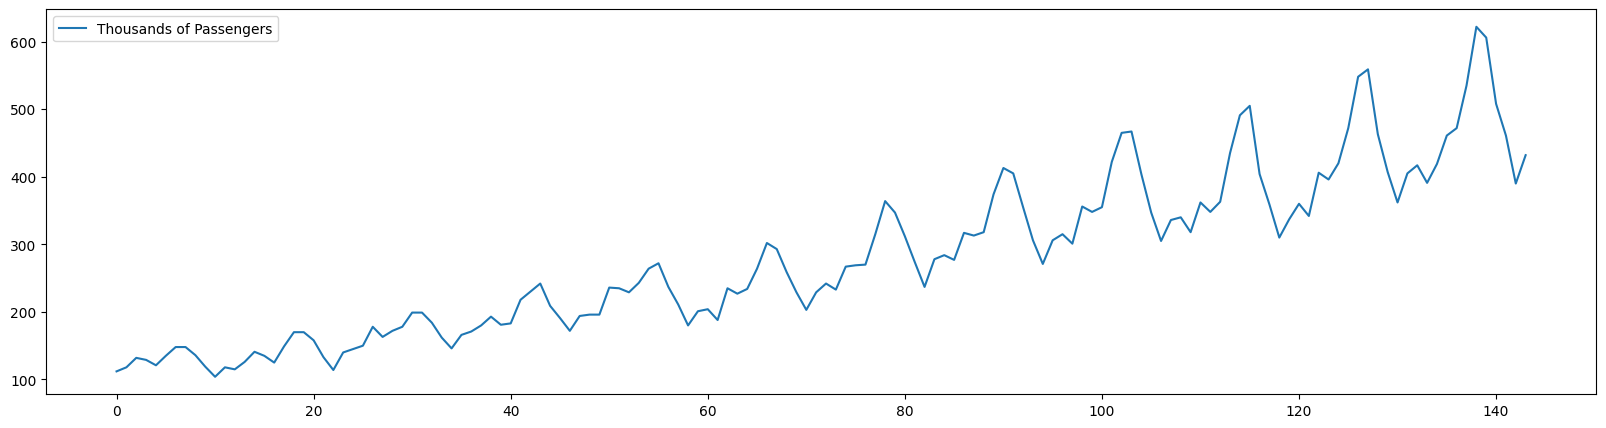

In [5]:
df.plot(figsize=(20, 5))

In [6]:
df.rename(columns={'Month': 'ds', 'Thousands of Passengers': 'y'}, inplace=True)
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [7]:
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [8]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot

## Initialize the FbProphet model

In [9]:
model = Prophet()

In [10]:
model.fit(df)

01:48:31 - cmdstanpy - INFO - Chain [1] start processing
01:48:32 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

## Create future dates for prediction

In [ ]:
df.tail()

In [12]:
future_dates = model.make_future_dataframe(periods=365)

In [13]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


## Predict

In [14]:
prediction = model.predict(future_dates)

In [15]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.406338,58.066321,113.733580,107.406338,107.406338,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,86.018883
1,1949-02-01,109.550561,53.066897,108.695135,109.550561,109.550561,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,0.0,0.0,0.0,79.495226
2,1949-03-01,111.487279,82.590321,139.371922,111.487279,111.487279,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,0.0,0.0,0.0,111.025581
3,1949-04-01,113.631502,81.762613,138.261409,113.631502,113.631502,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,0.0,0.0,0.0,108.719017
4,1949-05-01,115.706556,83.115615,141.243726,115.706556,115.706556,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,0.0,0.0,0.0,112.095281


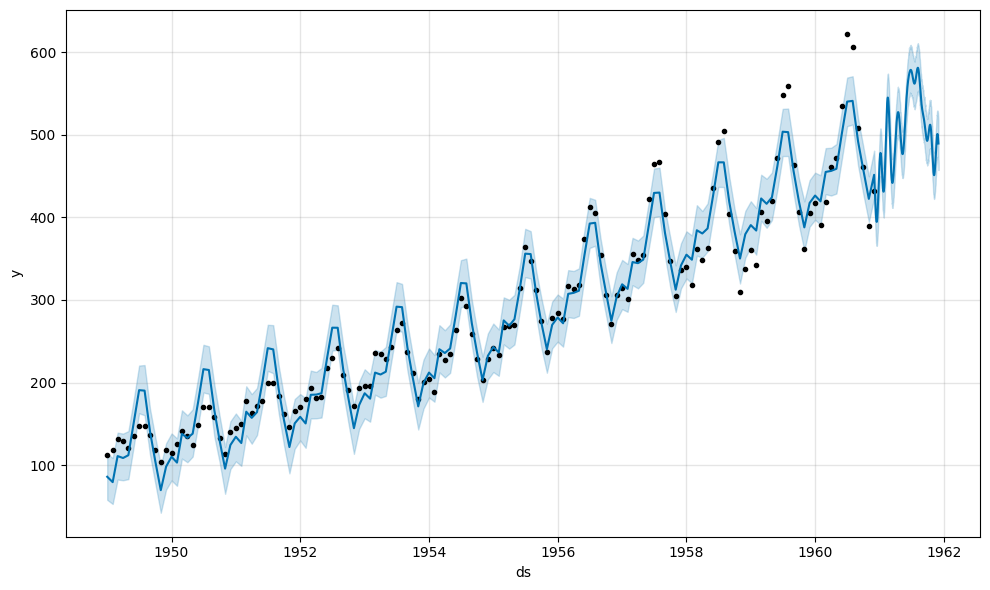

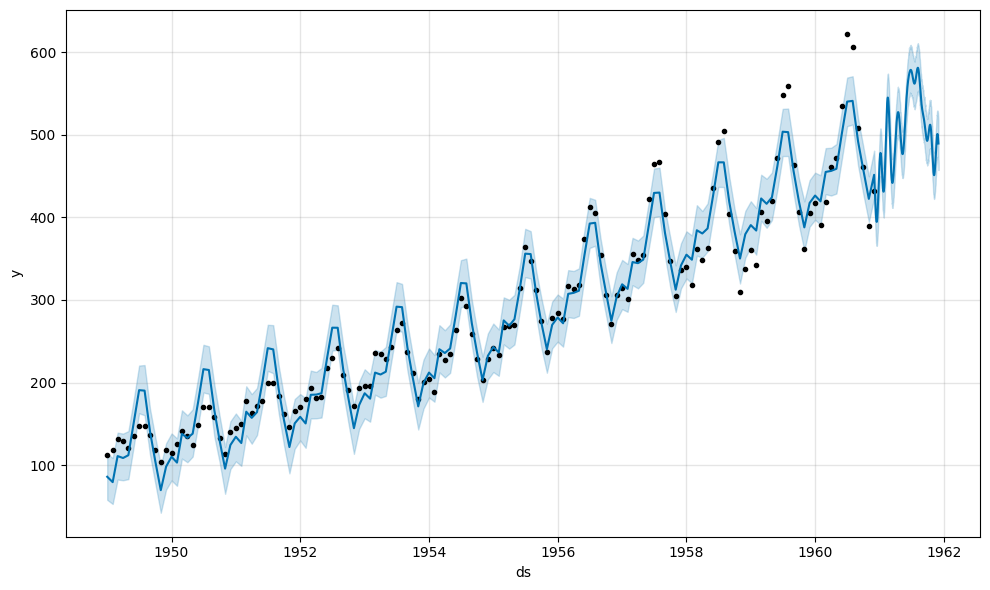

In [17]:
model.plot(prediction)

/mnt/d/vault/devhub/timeseries_cookbook/.venv/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/mnt/d/vault/devhub/timeseries_cookbook/.venv/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/mnt/d/vault/devhub/timeseries_cookbook/.venv/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series c

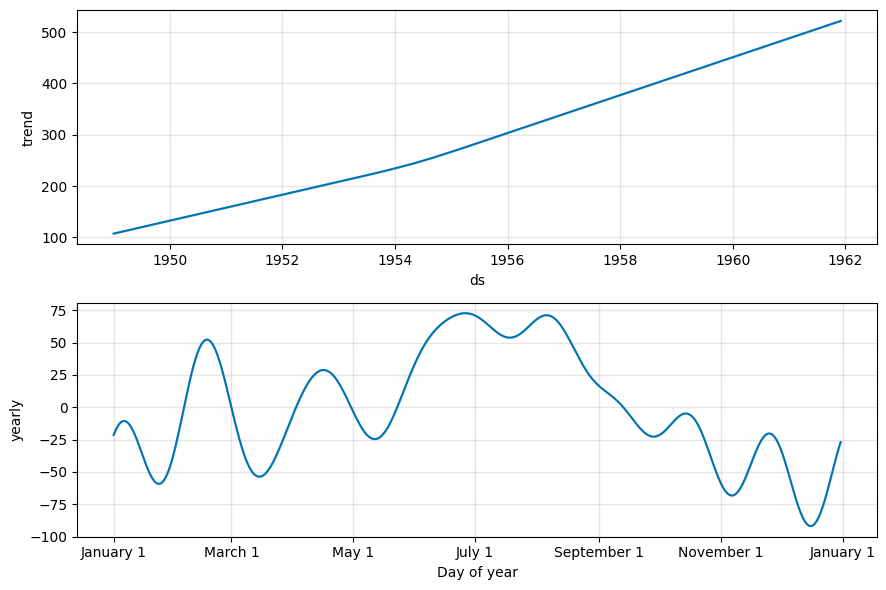

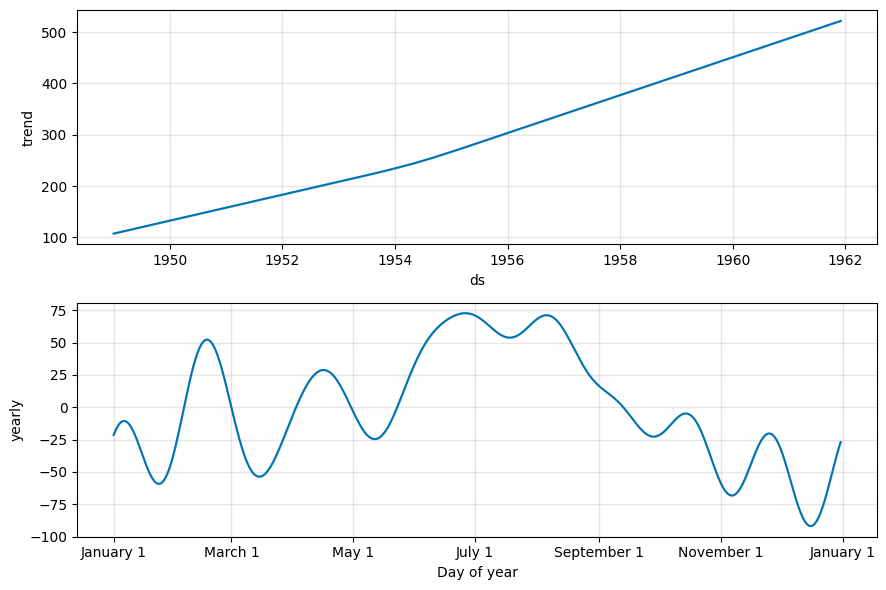

In [18]:
# visualize each component [Trends, Yearly]
model.plot_components(prediction)

## Validation

### Cross-Validation

In [23]:
from prophet.diagnostics import cross_validation # type: ignore

df_cross_validation = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cross_validation.head()

  0%|          | 0/19 [00:00<?, ?it/s]

02:10:01 - cmdstanpy - INFO - Chain [1] start processing
02:10:07 - cmdstanpy - INFO - Chain [1] done processing
02:10:07 - cmdstanpy - INFO - Chain [1] start processing
02:10:07 - cmdstanpy - INFO - Chain [1] done processing
02:10:07 - cmdstanpy - INFO - Chain [1] start processing
02:10:08 - cmdstanpy - INFO - Chain [1] done processing
02:10:08 - cmdstanpy - INFO - Chain [1] start processing
02:10:08 - cmdstanpy - INFO - Chain [1] done processing
02:10:08 - cmdstanpy - INFO - Chain [1] start processing
02:10:08 - cmdstanpy - INFO - Chain [1] done processing
02:10:08 - cmdstanpy - INFO - Chain [1] start processing
02:10:09 - cmdstanpy - INFO - Chain [1] done processing
02:10:09 - cmdstanpy - INFO - Chain [1] start processing
02:10:09 - cmdstanpy - INFO - Chain [1] done processing
02:10:09 - cmdstanpy - INFO - Chain [1] start processing
02:10:09 - cmdstanpy - INFO - Chain [1] done processing
02:10:09 - cmdstanpy - INFO - Chain [1] start processing
02:10:10 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.547043,158.324137,158.794061,150.0,1951-01-18
1,1951-03-01,171.930554,171.185909,172.738346,178.0,1951-01-18
2,1951-04-01,160.294061,158.882670,161.887391,163.0,1951-01-18
3,1951-05-01,146.088671,143.809822,148.555969,172.0,1951-01-18
4,1951-06-01,181.775393,178.602507,185.207842,178.0,1951-01-18


In [24]:
from prophet.diagnostics import performance_metrics # type: ignore

df_performance = performance_metrics(df_cross_validation)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1089.760435,33.011520,25.888183,0.078584,0.073832,0.079624,0.227273
1,42 days,1015.074527,31.860234,25.207161,0.076726,0.073832,0.077409,0.181818
2,46 days,909.815509,30.163148,24.622042,0.078579,0.078888,0.078319,0.136364
3,47 days,1044.416363,32.317431,26.737368,0.081351,0.085408,0.081498,0.136364
4,48 days,1034.025454,32.156266,26.194461,0.079480,0.085408,0.079693,0.181818


/mnt/d/vault/devhub/timeseries_cookbook/.venv/lib/python3.9/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/mnt/d/vault/devhub/timeseries_cookbook/.venv/lib/python3.9/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


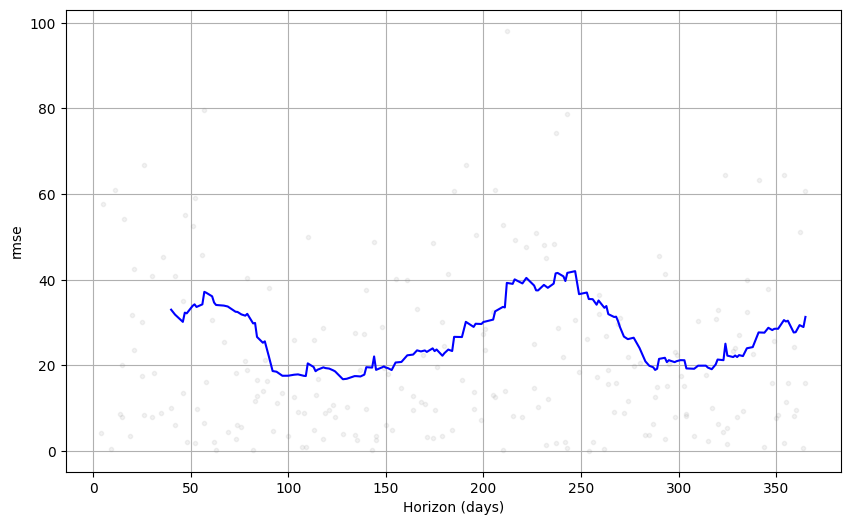

In [25]:
from prophet.plot import plot_cross_validation_metric # type: ignore

fig = plot_cross_validation_metric(df_cross_validation, metric='rmse')